# Project 2. 잃어버린 물건, 찾아줄게!

### 프로젝트 주제

서울시 대중교통 분실물 습득물 정보를 통한 분실물 찾기 & 찾아주기 서비스

---

### 프로젝트 목차

- 데이터 읽기
  - 데이터 불러오기
  - 데이터 구조 파악
- 데이터 전처리
  - 최근 5개년으로 데이터 줄이기
  - 컬럼 확인 및 정리
- 데이터 시각화
   - 연도별 월별 분실량
   - 연도별 월별 회수율
   - 카테고리별 분실
   - 자치구별 분실율 (자치구별 분실량 / 전체 분실량)
   - 분실물 상태에 따른 비율
- JSON 파일

---

### 데이터

- http://data.seoul.go.kr/dataList/OA-15490/S/1/datasetView.do

---

### 1. 데이터 읽기

#### 1-1. 데이터 불러오기

In [1]:
# 모듈 가져오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 폰트 패스로 지정 
import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

# 자동 사이즈 조정 
%matplotlib inline

In [3]:
# 경고창 무시

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
# 서울시 대중교통 분실물 습득물 정보 데이터 불러오기

lostfound_all = pd.read_csv('서울시 대중교통 분실물 습득물 정보.csv', encoding ='utf-8')

In [5]:
# 서울시 대중교통 분실물 데이터 상위 5개 출력

lostfound_all.head(5)

,분실물SEQ,분실물상태,등록일자,수령일자,유실물상세내용,분실장소,분실물등록자ID,분실물명,분실물종류,수령자치구,수령위치(회사),수령물건,조회수,추출일자
0,61741512,보관,2023-03-07,2023-03-07,저희 삼이택시에서는 2023년 03월 07일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,samitaxi,전자담배,기타,kwanak,삼이택시,차량내-,14.0,2023-03-07
1,61741511,수령,2023-03-07,2023-03-05,저희 동도자동차에서는 2023년 03월 05일 기타을(를) 습득/보관 하(였습니다....,회사내 분실센터,dongdo37,(본인수령완료)애플위치 임채*씨 010-5763-****,기타,kwangjin,동도자동차,택시내습득-,4.0,2023-03-05
2,61741491,보관,2023-03-06,2023-03-04,저희 삼이택시에서는 2023년 03월 04일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,samitaxi,안경,기타,kwanak,삼이택시,차량내-,5.0,2023-03-04
3,61741416,수령,2023-03-03,2023-03-02,저희 삼이택시에서는 2023년 03월 02일 핸드폰을(를) 습득/보관 하(였습니다....,회사내 분실센터,samitaxi,아이폰(고객님과 연락됨),핸드폰,kwanak,삼이택시,차량내-,29.0,2023-03-02
4,61741417,보관,2023-03-03,2023-03-02,저희 삼이택시에서는 2023년 03월 02일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,samitaxi,모자(고객님과 연락됨),기타,kwanak,삼이택시,차량내-,5.0,2023-03-02


#### 1-2. 데이터 구조 파악

In [6]:
# 서울시 대중교통 분실물 정보 데이터프레임 정보 요약

lostfound_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276921 entries, 0 to 276920
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   분실물SEQ    276921 non-null  int64  
 1   분실물상태     276432 non-null  object 
 2   등록일자      276350 non-null  object 
 3   수령일자      276917 non-null  object 
 4   유실물상세내용   270452 non-null  object 
 5   분실장소      276680 non-null  object 
 6   분실물등록자ID  142880 non-null  object 
 7   분실물명      276274 non-null  object 
 8   분실물종류     276921 non-null  object 
 9   수령자치구     142703 non-null  object 
 10  수령위치(회사)  142880 non-null  object 
 11  수령물건      142880 non-null  object 
 12  조회수       187616 non-null  float64
 13  추출일자      276921 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 29.6+ MB


In [7]:
# 서울시 대중교통 분실물 결측치 개수 확인

lostfound_all.isnull().sum()

분실물SEQ           0
분실물상태          489
등록일자           571
수령일자             4
유실물상세내용       6469
분실장소           241
분실물등록자ID    134041
분실물명           647
분실물종류            0
수령자치구       134218
수령위치(회사)    134041
수령물건        134041
조회수          89305
추출일자             0
dtype: int64

In [8]:
# 서울시 대중교통 분실물 등록일자 결측치 행 삭제

lostfound_all2 = lostfound_all[lostfound_all['등록일자'].notnull()]
lostfound_all2.isnull().sum()

분실물SEQ           0
분실물상태          489
등록일자             0
수령일자             0
유실물상세내용       5898
분실장소           237
분실물등록자ID    133470
분실물명            76
분실물종류            0
수령자치구       133647
수령위치(회사)    133470
수령물건        133470
조회수          89305
추출일자             0
dtype: int64

In [9]:
# 서울시 대중교통 분실물 등록일자 기준으로 데이터 정렬

lostfound_all = lostfound_all.sort_values(by = ['등록일자'], ascending = False)
lostfound_all

,분실물SEQ,분실물상태,등록일자,수령일자,유실물상세내용,분실장소,분실물등록자ID,분실물명,분실물종류,수령자치구,수령위치(회사),수령물건,조회수,추출일자
0,61741512,보관,2023-03-07,2023-03-07,저희 삼이택시에서는 2023년 03월 07일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,samitaxi,전자담배,기타,kwanak,삼이택시,차량내-,14.0,2023-03-07
1,61741511,수령,2023-03-07,2023-03-05,저희 동도자동차에서는 2023년 03월 05일 기타을(를) 습득/보관 하(였습니다....,회사내 분실센터,dongdo37,(본인수령완료)애플위치 임채*씨 010-5763-****,기타,kwangjin,동도자동차,택시내습득-,4.0,2023-03-05
19,61741472,NaN,2023-03-06,2023-02-25,저희 경일운수에서는 2023년 02월 25일 가방을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,kyoungil10,검정색 가방(본인통화 내사 후 찾아감 / 구*윤 010-24**82**<2/25>,가방,dobong,경일운수,차내습득-차내습득,1.0,2023-02-25
2,61741491,보관,2023-03-06,2023-03-04,저희 삼이택시에서는 2023년 03월 04일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,samitaxi,안경,기타,kwanak,삼이택시,차량내-,5.0,2023-03-04
9,61741453,수령,2023-03-06,2023-03-01,저희 경일운수에서는 2023년 03월 01일 핸드폰을(를) 습득/보관 하(였습니다....,회사내 분실센터,kyoungil10,아이폰/ 본인통화 내사 후 찾아감(김*린 010-46**-94**) -3/1,핸드폰,dobong,경일운수,차내습득-차내습득,1.0,2023-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14930,1368397,보관,NaN,2018-04-25,NaN,개화역,NaN,NaN,기타,NaN,NaN,NaN,7.0,2018-04-26
28082,1364084,보관,NaN,NaN,NaN,NaN,NaN,NaN,기타,NaN,NaN,NaN,0.0,2017-04-26
31588,1360729,보관,NaN,NaN,NaN,NaN,NaN,NaN,기타,NaN,NaN,NaN,0.0,2017-03-25
160190,1228831,보관,NaN,NaN,NaN,NaN,NaN,NaN,기타,NaN,NaN,NaN,0.0,2016-09-23


In [10]:
#서울 대중교통 분실물 애매한 컬럼명 수정 (분실장소 -> 보관장소, 수령자치구 -> 분실지역, 수령위치(회사) -> 습득자(회사))

lostfound_all.rename(columns = {'분실장소':'보관장소', '수령자치구':'분실지역', '수령위치(회사)':'습득자(회사)'}, inplace = True)
lostfound_all.columns

Index(['분실물SEQ', '분실물상태', '등록일자', '수령일자', '유실물상세내용', '보관장소', '분실물등록자ID',
       '분실물명', '분실물종류', '분실지역', '습득자(회사)', '수령물건', '조회수', '추출일자'],
      dtype='object')

---

### 2. 데이터 전처리

#### 2-1. 최근 5개년으로 데이터 줄이기

In [11]:
# 서울시 대중교통 분실물 최근 5개년만 출력

lostfound_5year = lostfound_all[lostfound_all['수령일자'] >= '2020-01-01']
lostfound_5year

,분실물SEQ,분실물상태,등록일자,수령일자,유실물상세내용,보관장소,분실물등록자ID,분실물명,분실물종류,분실지역,습득자(회사),수령물건,조회수,추출일자
0,61741512,보관,2023-03-07,2023-03-07,저희 삼이택시에서는 2023년 03월 07일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,samitaxi,전자담배,기타,kwanak,삼이택시,차량내-,14.0,2023-03-07
1,61741511,수령,2023-03-07,2023-03-05,저희 동도자동차에서는 2023년 03월 05일 기타을(를) 습득/보관 하(였습니다....,회사내 분실센터,dongdo37,(본인수령완료)애플위치 임채*씨 010-5763-****,기타,kwangjin,동도자동차,택시내습득-,4.0,2023-03-05
19,61741472,NaN,2023-03-06,2023-02-25,저희 경일운수에서는 2023년 02월 25일 가방을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,kyoungil10,검정색 가방(본인통화 내사 후 찾아감 / 구*윤 010-24**82**<2/25>,가방,dobong,경일운수,차내습득-차내습득,1.0,2023-02-25
2,61741491,보관,2023-03-06,2023-03-04,저희 삼이택시에서는 2023년 03월 04일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,samitaxi,안경,기타,kwanak,삼이택시,차량내-,5.0,2023-03-04
9,61741453,수령,2023-03-06,2023-03-01,저희 경일운수에서는 2023년 03월 01일 핸드폰을(를) 습득/보관 하(였습니다....,회사내 분실센터,kyoungil10,아이폰/ 본인통화 내사 후 찾아감(김*린 010-46**-94**) -3/1,핸드폰,dobong,경일운수,차내습득-차내습득,1.0,2023-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,61718237,수령,2020-01-04,2020-01-04,저희 상진운수에서는 2020년 01월 04일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,상진운수,갈색 장갑,기타,도봉구,상진운수,차내-종점,39.0,2020-01-04
5294,61718208,수령,2020-01-03,2020-01-01,저희 대진흥업에서는 2020년 01월 01일 핸드폰을(를) 습득/보관 하(였습니다....,회사내 분실센터,daejin8013,갤럭시 노트 10(연락됨),핸드폰,광진구,대진흥업,-,20.0,2020-01-01
5287,61718193,수령,2020-01-02,2020-01-02,저희 동성상운에서는 2020년 01월 02일 가방(손가방지갑(차*관)현금=찾아감)을...,회사내 분실센터,ehdtjd,손가방지갑(차*관)현금=찾아감,가방,노원구,동성상운,.-.,69.0,2020-01-02
5297,61718181,보관,2020-01-02,2020-01-01,저희 고려운수에서는 2020년 01월 01일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,krcars,검은색보조배터리,기타,성동구,고려운수,차내습득-,18.0,2020-01-01


In [12]:
# 서울 대중교통 분실물 최근 5개년 정보 요약

lostfound_5year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5304 entries, 0 to 10440
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   분실물SEQ    5304 non-null   int64  
 1   분실물상태     5295 non-null   object 
 2   등록일자      5304 non-null   object 
 3   수령일자      5304 non-null   object 
 4   유실물상세내용   5304 non-null   object 
 5   보관장소      5304 non-null   object 
 6   분실물등록자ID  5304 non-null   object 
 7   분실물명      5304 non-null   object 
 8   분실물종류     5304 non-null   object 
 9   분실지역      5303 non-null   object 
 10  습득자(회사)   5304 non-null   object 
 11  수령물건      5304 non-null   object 
 12  조회수       5304 non-null   float64
 13  추출일자      5304 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 621.6+ KB


In [13]:
# 서울 대중교통 분실물 최근 5개년 컬럼별 결측치 수

lostfound_5year.isnull().sum()

분실물SEQ      0
분실물상태       9
등록일자        0
수령일자        0
유실물상세내용     0
보관장소        0
분실물등록자ID    0
분실물명        0
분실물종류       0
분실지역        1
습득자(회사)     0
수령물건        0
조회수         0
추출일자        0
dtype: int64

In [14]:
# 서울 대중교통 분실물 최근 5개년 결측치가 있는 행 제거

lostfound_5year = lostfound_5year.dropna(axis = 0)
lostfound_5year.isnull().sum()

분실물SEQ      0
분실물상태       0
등록일자        0
수령일자        0
유실물상세내용     0
보관장소        0
분실물등록자ID    0
분실물명        0
분실물종류       0
분실지역        0
습득자(회사)     0
수령물건        0
조회수         0
추출일자        0
dtype: int64

In [15]:
# 서울 대중교통 분실물 최근 5개년 인덱스 값 재정렬

lostfound_5year.reset_index(inplace = True, drop = True)
lostfound_5year

,분실물SEQ,분실물상태,등록일자,수령일자,유실물상세내용,보관장소,분실물등록자ID,분실물명,분실물종류,분실지역,습득자(회사),수령물건,조회수,추출일자
0,61741512,보관,2023-03-07,2023-03-07,저희 삼이택시에서는 2023년 03월 07일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,samitaxi,전자담배,기타,kwanak,삼이택시,차량내-,14.0,2023-03-07
1,61741511,수령,2023-03-07,2023-03-05,저희 동도자동차에서는 2023년 03월 05일 기타을(를) 습득/보관 하(였습니다....,회사내 분실센터,dongdo37,(본인수령완료)애플위치 임채*씨 010-5763-****,기타,kwangjin,동도자동차,택시내습득-,4.0,2023-03-05
2,61741491,보관,2023-03-06,2023-03-04,저희 삼이택시에서는 2023년 03월 04일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,samitaxi,안경,기타,kwanak,삼이택시,차량내-,5.0,2023-03-04
3,61741453,수령,2023-03-06,2023-03-01,저희 경일운수에서는 2023년 03월 01일 핸드폰을(를) 습득/보관 하(였습니다....,회사내 분실센터,kyoungil10,아이폰/ 본인통화 내사 후 찾아감(김*린 010-46**-94**) -3/1,핸드폰,dobong,경일운수,차내습득-차내습득,1.0,2023-03-01
4,61741451,수령,2023-03-06,2023-02-25,저희 경일운수에서는 2023년 02월 25일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,kyoungil10,에어팟0보라색 -한족 /본인통화 내사 후 찾아감/ 서*택 010-87**-64**(...,기타,dobong,경일운수,차내습득-차내습득,3.0,2023-02-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,61718237,수령,2020-01-04,2020-01-04,저희 상진운수에서는 2020년 01월 04일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,상진운수,갈색 장갑,기타,도봉구,상진운수,차내-종점,39.0,2020-01-04
5290,61718208,수령,2020-01-03,2020-01-01,저희 대진흥업에서는 2020년 01월 01일 핸드폰을(를) 습득/보관 하(였습니다....,회사내 분실센터,daejin8013,갤럭시 노트 10(연락됨),핸드폰,광진구,대진흥업,-,20.0,2020-01-01
5291,61718193,수령,2020-01-02,2020-01-02,저희 동성상운에서는 2020년 01월 02일 가방(손가방지갑(차*관)현금=찾아감)을...,회사내 분실센터,ehdtjd,손가방지갑(차*관)현금=찾아감,가방,노원구,동성상운,.-.,69.0,2020-01-02
5292,61718181,보관,2020-01-02,2020-01-01,저희 고려운수에서는 2020년 01월 01일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,krcars,검은색보조배터리,기타,성동구,고려운수,차내습득-,18.0,2020-01-01


#### 2-2. 컬럼 확인 및 정리

In [16]:
# 서울 대중교통 분실물 최근 5개년 컬럼(조회수, 추출일자) 제거

lostfound_5year = lostfound_5year.drop(['조회수', '추출일자'], axis = 1)
lostfound_5year

,분실물SEQ,분실물상태,등록일자,수령일자,유실물상세내용,보관장소,분실물등록자ID,분실물명,분실물종류,분실지역,습득자(회사),수령물건
0,61741512,보관,2023-03-07,2023-03-07,저희 삼이택시에서는 2023년 03월 07일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,samitaxi,전자담배,기타,kwanak,삼이택시,차량내-
1,61741511,수령,2023-03-07,2023-03-05,저희 동도자동차에서는 2023년 03월 05일 기타을(를) 습득/보관 하(였습니다....,회사내 분실센터,dongdo37,(본인수령완료)애플위치 임채*씨 010-5763-****,기타,kwangjin,동도자동차,택시내습득-
2,61741491,보관,2023-03-06,2023-03-04,저희 삼이택시에서는 2023년 03월 04일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,samitaxi,안경,기타,kwanak,삼이택시,차량내-
3,61741453,수령,2023-03-06,2023-03-01,저희 경일운수에서는 2023년 03월 01일 핸드폰을(를) 습득/보관 하(였습니다....,회사내 분실센터,kyoungil10,아이폰/ 본인통화 내사 후 찾아감(김*린 010-46**-94**) -3/1,핸드폰,dobong,경일운수,차내습득-차내습득
4,61741451,수령,2023-03-06,2023-02-25,저희 경일운수에서는 2023년 02월 25일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,kyoungil10,에어팟0보라색 -한족 /본인통화 내사 후 찾아감/ 서*택 010-87**-64**(...,기타,dobong,경일운수,차내습득-차내습득
...,...,...,...,...,...,...,...,...,...,...,...,...
5289,61718237,수령,2020-01-04,2020-01-04,저희 상진운수에서는 2020년 01월 04일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,상진운수,갈색 장갑,기타,도봉구,상진운수,차내-종점
5290,61718208,수령,2020-01-03,2020-01-01,저희 대진흥업에서는 2020년 01월 01일 핸드폰을(를) 습득/보관 하(였습니다....,회사내 분실센터,daejin8013,갤럭시 노트 10(연락됨),핸드폰,광진구,대진흥업,-
5291,61718193,수령,2020-01-02,2020-01-02,저희 동성상운에서는 2020년 01월 02일 가방(손가방지갑(차*관)현금=찾아감)을...,회사내 분실센터,ehdtjd,손가방지갑(차*관)현금=찾아감,가방,노원구,동성상운,.-.
5292,61718181,보관,2020-01-02,2020-01-01,저희 고려운수에서는 2020년 01월 01일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,krcars,검은색보조배터리,기타,성동구,고려운수,차내습득-


- 컬럼별 확인 - 분실물 상태 / 보관장소

In [17]:
# 서울 대중교통 분실물 최근 5개년 컬럼별 겹치지 않는 값 확인 - 분실물상태

set(lostfound_5year['분실물상태']), len(set(lostfound_5year['분실물상태']))

({'¼o?E', '경찰서이관', '보관', '수령', '우체국이관'}, 5)

In [18]:
#서울 대중교통 분실물 최근 5개년 분실물상태 컬럼에서 결측치 값 같은 값을 가진 행 삭제

lostfound_5year.drop(lostfound_5year[lostfound_5year['분실물상태'] == '¼o?E'].index, inplace = True)
set(lostfound_5year['분실물상태']), len(set(lostfound_5year['분실물상태']))

({'경찰서이관', '보관', '수령', '우체국이관'}, 4)

In [19]:
# 서울 대중교통 분실물 현재 위치 잘 있는지 확인 - 경찰서

len(lostfound_5year[lostfound_5year['분실물상태'] == '경찰서이관']), len(lostfound_5year[lostfound_5year['보관장소'] == '경찰서'])

(591, 579)

In [20]:
# 상위 두 값이 다르니, 분실물 상태, 분실 장소 위치가 다른 칼럼 출력 - 경찰서

df1 = lostfound_5year[(lostfound_5year['분실물상태'] == '경찰서이관') & ~(lostfound_5year['보관장소'] == '경찰서')]
df1

,분실물SEQ,분실물상태,등록일자,수령일자,유실물상세내용,보관장소,분실물등록자ID,분실물명,분실물종류,분실지역,습득자(회사),수령물건
523,61738651,경찰서이관,2022-09-23,2022-09-23,저희 상진운수에서는 2022년 09월 23일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,상진운수,책,기타,dobong,상진운수,차내-차내
2416,61727471,경찰서이관,2021-05-09,2021-05-09,저희 고려운수에서는 2021년 05월 09일 기타(손지갑)을(를) 습득/보관 하(였...,회사내 분실센터,krcars,손지갑,기타,seongdong,고려운수,차내-차내
2496,61727032,경찰서이관,2021-04-19,2021-04-15,저희 고려운수에서는 2021년 04월 15일 지갑을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,krcars,카드및신분증(김태*),지갑,seongdong,고려운수,차내-
2500,61727051,경찰서이관,2021-04-18,2021-04-18,저희 고려운수에서는 2021년 04월 18일 핸드폰(핸드폰)을(를) 습득/보관 하(...,회사내 분실센터,krcars,핸드폰,핸드폰,seongdong,고려운수,차내-차내
3623,61722203,경찰서이관,2020-08-18,2020-08-14,저희 고려운수에서는 2020년 08월 14일 핸드폰을(를) 습득/보관 하(였습니다....,회사내 분실센터,krcars,갤럭시s10+,핸드폰,seongdong,고려운수,차내습득-
3727,61721913,경찰서이관,2020-08-03,2020-07-29,저희 고려운수에서는 2020년 07월 29일 핸드폰을(를) 습득/보관 하(였습니다....,회사내 분실센터,krcars,갤럭시S6,핸드폰,seongdong,고려운수,차내습득-
3735,61721914,경찰서이관,2020-08-03,2020-07-29,저희 고려운수에서는 2020년 07월 29일 핸드폰을(를) 습득/보관 하(였습니다....,회사내 분실센터,krcars,LG V30,핸드폰,seongdong,고려운수,차내습득-
3871,61721500,경찰서이관,2020-07-16,2020-07-15,저희 고려운수에서는 2020년 07월 15일 지갑을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,krcars,카드지갑(어르신교통카드),지갑,seongdong,고려운수,차내습득-
3988,61721327,경찰서이관,2020-07-02,2020-07-02,저희 경일운수에서는 2020년 07월 02일 지갑(카드지갑(감정-베트남/TRAN Q...,회사내 분실센터,kyoungil10,"카드지갑(감정-베트남/TRAN QUANG HUY-외국인유학생-하나카드 외 현금13,...",지갑,dobong,경일운수,차내습득-차내습득
4778,61719310,경찰서이관,2020-02-28,2020-01-22,저희 대진흥업에서는 2020년 01월 22일 가방을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,daejin8013,캘빈클라인가방(경찰서이관),가방,광진구,대진흥업,-


In [21]:
# 분실물상태가 경찰서 이관이라면 현재 보관장소는 경찰서이니, 경찰서로 변경

lostfound_5year.loc[(lostfound_5year['분실물상태'] == '경찰서이관'), '보관장소'] = '경찰서'
len(lostfound_5year[lostfound_5year['분실물상태'] == '경찰서이관']), len(lostfound_5year[lostfound_5year['보관장소'] == '경찰서'])

(591, 591)

In [22]:
# 서울 대중교통 분실물 현재 위치 잘 있는지 확인 - 우체국

len(lostfound_5year[lostfound_5year['분실물상태'] == '우체국이관']), len(lostfound_5year[lostfound_5year['보관장소'] == '우체국'])

(17, 6)

In [23]:
# 상위 두 값이 다르니, 분실물 상태, 분실 장소 위치가 다른 칼럼 출력 - 우체국

df2 = lostfound_5year[(lostfound_5year['분실물상태'] == '우체국이관') & ~(lostfound_5year['보관장소'] == '우체국')]
df2

,분실물SEQ,분실물상태,등록일자,수령일자,유실물상세내용,보관장소,분실물등록자ID,분실물명,분실물종류,분실지역,습득자(회사),수령물건
530,61738711,우체국이관,2022-09-20,2022-09-20,저희 삼이택시에서는 2022년 09월 20일 기타(신분증(김*민))을(를) 습득/보...,회사내 분실센터,samitaxi,신분증(김*민),기타,kwanak,삼이택시,차량내-문래차고지
2079,61729186,우체국이관,2021-07-19,2021-07-17,저희 삼이택시에서는 2021년 07월 17일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,samitaxi,신분증한장(권*진),기타,kwanak,삼이택시,차량내-
2482,61727154,우체국이관,2021-04-27,2021-04-26,저희 삼이택시에서는 2021년 04월 26일 지갑을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,samitaxi,신분증및 현금,지갑,kwanak,삼이택시,차량내-
2671,61725971,우체국이관,2021-03-10,2021-03-03,저희 경일운수에서는 2021년 03월 03일 핸드폰을(를) 습득/보관 하(였습니다....,회사내 분실센터,kyoungil10,핸드폰-삼성(타인명함-뒷면에 두장)-우체국 이관,핸드폰,dobong,경일운수,차내습득-차내습득
2736,61725742,우체국이관,2021-02-25,2021-02-16,저희 고려운수에서는 2021년 02월 16일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,krcars,김기석 면허증,기타,seongdong,고려운수,차내습득-
3070,61724153,우체국이관,2020-11-26,2020-11-23,저희 중부운수에서는 2020년 11월 23일 지갑을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,중부운수,"확생증, 2,000원",지갑,kangseo,중부운수,문래차고지-문래차고지
3683,61721950,우체국이관,2020-08-06,2020-08-02,저희 경일운수에서는 2020년 08월 02일 핸드폰을(를) 습득/보관 하(였습니다....,회사내 분실센터,kyoungil10,핸드폰-갤9 -----8/6 우체국이관,핸드폰,dobong,경일운수,차내습득-차내습득
3837,61721624,우체국이관,2020-07-20,2020-07-19,저희 고려운수에서는 2020년 07월 19일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,krcars,이재* 주민등록증,기타,seongdong,고려운수,차내습득-
3863,61721690,우체국이관,2020-07-17,2020-07-17,저희 삼이택시에서는 2020년 07월 17일 핸드폰(갤r프로)을(를) 습득/보관 하...,회사내 분실센터,samitaxi,갤r프로,핸드폰,kwanak,삼이택시,차량내-차량내
3952,61721325,우체국이관,2020-07-06,2020-07-01,저희 경일운수에서는 2020년 07월 01일 핸드폰을(를) 습득/보관 하(였습니다....,회사내 분실센터,kyoungil10,아이폰-삼성(검정0파란색 공간도형 바탕,핸드폰,dobong,경일운수,차내습득-차내습득


In [24]:
# 분실물상태가 우체국 이관이라면 현재 보관장소는 우체국이니, 우체국으로 변경

lostfound_5year.loc[(lostfound_5year['분실물상태'] == '우체국이관'), '보관장소'] = '우체국'
len(lostfound_5year[lostfound_5year['분실물상태'] == '우체국이관']), len(lostfound_5year[lostfound_5year['보관장소'] == '우체국'])

(17, 18)

In [25]:
# 보관장소가 우체국인 데이터가 한 개 더 많아 다시 확인

df3 = lostfound_5year[(lostfound_5year['보관장소'] == '우체국') & ~(lostfound_5year['분실물상태'] == '우체국이관')]
df3

,분실물SEQ,분실물상태,등록일자,수령일자,유실물상세내용,보관장소,분실물등록자ID,분실물명,분실물종류,분실지역,습득자(회사),수령물건
3241,61723446,수령,2020-10-27,2020-10-27,저희 삼이택시에서는 2020년 10월 27일 가방(노트북)을(를) 습득/보관 하(였...,우체국,samitaxi,노트북,가방,kwanak,삼이택시,차량내-차량내


In [26]:
# 분실물상태 경찰서이관, 우체국이관일 경우 이관으로 변경

lostfound_5year['분실물상태'] = lostfound_5year['분실물상태'].replace({'경찰서이관':'이관', '우체국이관':'이관'} )
set(lostfound_5year['분실물상태'])

{'보관', '수령', '이관'}

In [27]:
# 분실물상태가 수령인 경우 보관장소 본인으로 변경

lostfound_5year.loc[(lostfound_5year['분실물상태'] == '수령'), '보관장소'] = '본인'
lostfound_5year['보관장소'].value_counts()

본인          3518
회사내 분실센터    1167
경찰서          591
우체국           17
Name: 보관장소, dtype: int64

In [28]:
# 분실물상태 컬럼값 확인

lostfound_5year['분실물상태'].value_counts()

수령    3518
보관    1167
이관     608
Name: 분실물상태, dtype: int64

- 컬럼별 확인 - 분실물종류

In [29]:
# 서울 대중교통 분실물 최근 5개년 컬럼별 겹치지 않는 값 확인 - 분실물종류

set(lostfound_5year['분실물종류']), len(set(lostfound_5year['분실물종류']))

({'가방', '기타', '베낭', '서류봉투', '쇼핑백', '옷', '장난감', '지갑', '책', '파일', '핸드폰'}, 11)

In [30]:
# 서울 대중교통 분실물 최근 5개년 컬럼별 베낭 가방으로 통일

lostfound_5year['분실물종류'] = lostfound_5year['분실물종류'].replace({'베낭':'가방'})

1-3-3. 컬럼별 확인 - 분실지역

In [31]:
# 서울 대중교통 분실물 최근 5개년 컬럼별 겹치지 않는 값 확인 - 분실지역

set(lostfound_5year['분실지역']), len(set(lostfound_5year['분실지역']))

({'dobong',
  'dongjak',
  'eunpyong',
  'geumcheon',
  'joongrang',
  'kangnam',
  'kangseo',
  'kwanak',
  'kwangjin',
  'nowon',
  'seongdong',
  'youngdeungpo',
  '강동구',
  '강서구',
  '관악구',
  '광진구',
  '금천구',
  '노원구',
  '도봉구',
  '동작구',
  '서초구',
  '성동구',
  '영등포구',
  '은평구',
  '중랑구'},
 25)

In [32]:
# 서울 대중교통 분실물 최근 5개년 분실지역 영어이름 ->한글로

lostfound_5year['분실지역'] = lostfound_5year['분실지역'].replace({'dobong':'도봉구', 'dongjak':'동작구', 'eunpyong':'은평구', 'geumcheon':'금천구', 'joongrang':'중랑구', 'kangnam':'강남구', 'kangseo':'강서구', 'kwanak':'관악구', 'kwangjin':'광진구', 'nowon':'노원구', 'seongdong':'성동구', 'youngdeungpo':'영등포구'})
set(lostfound_5year['분실지역']), len(set(lostfound_5year['분실지역']))

({'강남구',
  '강동구',
  '강서구',
  '관악구',
  '광진구',
  '금천구',
  '노원구',
  '도봉구',
  '동작구',
  '서초구',
  '성동구',
  '영등포구',
  '은평구',
  '중랑구'},
 14)

- 컬럼별 확인 - 분실물등록자ID

In [33]:
set(lostfound_5year['분실물등록자ID']), len(set(lostfound_5year['분실물등록자ID']))

({'7770',
  'DaeHan',
  'baekje01',
  'daejin8013',
  'dh286',
  'dongdo37',
  'donghae2',
  'ehdtjd',
  'kimyounsu1',
  'krcars',
  'kyoungil10',
  'kyungseo1',
  'robin8729',
  'samitaxi',
  'samiwoonsu',
  'siktaxi1',
  'sjts109',
  'yp5851',
  '대성통운',
  '대진여객',
  '동성교통',
  '보성운수',
  '상진운수',
  '서울버스',
  '원버스',
  '중부운수'},
 26)

- 컬럼별 확인 - 습득자(회사)

In [34]:
# 서울 대중교통 분실물 최근 5개년 컬럼별 겹치지 않는 값 확인 - 수령위치(회사)

set(lostfound_5year['습득자(회사)']), len(set(lostfound_5year['습득자(회사)']))

({'경서운수',
  '경일운수',
  '고려운수',
  '대원여객',
  '대진여객',
  '대진흥업',
  '대하운수',
  '대한상운',
  '동도자동차',
  '동성교통',
  '동성상운',
  '동화통운',
  '백제운수',
  '보성운수',
  '삼이운수',
  '삼이택시',
  '삼익택시',
  '상진운수',
  '새한택시',
  '서울버스',
  '선일교통',
  '성원여객',
  '승진통상',
  '안전한택시',
  '양평운수',
  '원버스',
  '중부운수',
  '진화'},
 28)

- 등록일자 / 수령일자 연도, 월만 저장하는 컬럼 생성

In [35]:
# 등록일자 연, 월, 일로 쪼개어 리스트에 저장

date_list = lostfound_5year['등록일자'].str.split('-')
date_list.head()

0    [2023, 03, 07]
1    [2023, 03, 07]
2    [2023, 03, 06]
3    [2023, 03, 06]
4    [2023, 03, 06]
Name: 등록일자, dtype: object

In [36]:
# 등록일자 연, 월 새로운 컬럼에 저장

lostfound_5year['등록일자_연'] = date_list.str.get(0)
lostfound_5year['등록일자_월'] = date_list.str.get(1)
lostfound_5year.head()

,분실물SEQ,분실물상태,등록일자,수령일자,유실물상세내용,보관장소,분실물등록자ID,분실물명,분실물종류,분실지역,습득자(회사),수령물건,등록일자_연,등록일자_월
0,61741512,보관,2023-03-07,2023-03-07,저희 삼이택시에서는 2023년 03월 07일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,samitaxi,전자담배,기타,관악구,삼이택시,차량내-,2023,03
1,61741511,수령,2023-03-07,2023-03-05,저희 동도자동차에서는 2023년 03월 05일 기타을(를) 습득/보관 하(였습니다....,본인,dongdo37,(본인수령완료)애플위치 임채*씨 010-5763-****,기타,광진구,동도자동차,택시내습득-,2023,03
2,61741491,보관,2023-03-06,2023-03-04,저희 삼이택시에서는 2023년 03월 04일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,samitaxi,안경,기타,관악구,삼이택시,차량내-,2023,03
3,61741453,수령,2023-03-06,2023-03-01,저희 경일운수에서는 2023년 03월 01일 핸드폰을(를) 습득/보관 하(였습니다....,본인,kyoungil10,아이폰/ 본인통화 내사 후 찾아감(김*린 010-46**-94**) -3/1,핸드폰,도봉구,경일운수,차내습득-차내습득,2023,03
4,61741451,수령,2023-03-06,2023-02-25,저희 경일운수에서는 2023년 02월 25일 기타을(를) 습득/보관 하(였습니다.)...,본인,kyoungil10,에어팟0보라색 -한족 /본인통화 내사 후 찾아감/ 서*택 010-87**-64**(...,기타,도봉구,경일운수,차내습득-차내습득,2023,03


In [37]:
# 수령일자 연, 월 새로운 컬럼에 저장

lostfound_5year['수령일자_연'] = date_list.str.get(0)
lostfound_5year['수령일자_월'] = date_list.str.get(1)
lostfound_5year.head()

,분실물SEQ,분실물상태,등록일자,수령일자,유실물상세내용,보관장소,분실물등록자ID,분실물명,분실물종류,분실지역,습득자(회사),수령물건,등록일자_연,등록일자_월,수령일자_연,수령일자_월
0,61741512,보관,2023-03-07,2023-03-07,저희 삼이택시에서는 2023년 03월 07일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,samitaxi,전자담배,기타,관악구,삼이택시,차량내-,2023,03,2023,03
1,61741511,수령,2023-03-07,2023-03-05,저희 동도자동차에서는 2023년 03월 05일 기타을(를) 습득/보관 하(였습니다....,본인,dongdo37,(본인수령완료)애플위치 임채*씨 010-5763-****,기타,광진구,동도자동차,택시내습득-,2023,03,2023,03
2,61741491,보관,2023-03-06,2023-03-04,저희 삼이택시에서는 2023년 03월 04일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,samitaxi,안경,기타,관악구,삼이택시,차량내-,2023,03,2023,03
3,61741453,수령,2023-03-06,2023-03-01,저희 경일운수에서는 2023년 03월 01일 핸드폰을(를) 습득/보관 하(였습니다....,본인,kyoungil10,아이폰/ 본인통화 내사 후 찾아감(김*린 010-46**-94**) -3/1,핸드폰,도봉구,경일운수,차내습득-차내습득,2023,03,2023,03
4,61741451,수령,2023-03-06,2023-02-25,저희 경일운수에서는 2023년 02월 25일 기타을(를) 습득/보관 하(였습니다.)...,본인,kyoungil10,에어팟0보라색 -한족 /본인통화 내사 후 찾아감/ 서*택 010-87**-64**(...,기타,도봉구,경일운수,차내습득-차내습득,2023,03,2023,03


---

### 3. 데이터 시각화

#### 3-1. 연도별 월별 분실량 (수령일자?분실일자 기준) - 연도별 다른 그래프 - 꺾은선

In [38]:
# 연, 월에 따라 분류한 분실량 데이터프레임 만들기

grouped_year_month = pd.DataFrame(lostfound_5year.groupby(['수령일자_연','수령일자_월'] ).size())
# grouped_year_month = lostfound_5year.groupby(['수령일자_연','수령일자_월'] ).count()
grouped_year_month.rename(columns = {0:'분실량'}, inplace = True)
grouped_year_month

분실량
수령일자_연 수령일자_월     
2020   01      266
       02      259
       03      213
       04      124
       05      193
       06      230
       07      270
       08      205
       09      137
       10      186
       11      147
       12      136
2021   01      103
       02       93
       03      139
       04      130
       05      148
       06      192
       07       87
       08      104
       09      125
       10      111
       11      139
       12      121
2022   01       88
       02      100
       03       88
       04      115
       05      112
       06      121
       07      143
       08       95
       09       81
       10       67
       11       88
       12      102
2023   01       90
       02       97
       03       48

In [39]:
# # 수령일자 기준으로 오름차순 배열

# lostfound_5year_a = lostfound_5year.sort_values(by = ['수령일자'])
# lostfound_5year_a

In [40]:
# lostfound_5year_a[lostfound_5year_a.수령일자_연.isin(['2020'])]

In [41]:
# #각자 그래프 그리기 (바 그래프)

# plt.figure(figsize=(20,10))
# ax = sns.countplot(x="수령일자_월", data=lostfound_5year_a[lostfound_5year_a.수령일자_연.isin(['2020', '2021', '2022'])], hue = "수령일자_연", palette = 'Set1')
# plt.title('연도별 월별 분실량', fontsize=20)
# plt.xlabel('월', fontsize=15)
# plt.ylabel('분실량', fontsize=15)
# plt.show()

In [42]:
# 조건에 맞는 데이터프레임 재편성

#grouped_year_month2 = lostfound_5year[lostfound_5year['수령일자_연', '수령일자_월', ]]
tmp1 = pd.DataFrame(lostfound_5year.groupby(["수령일자_연", "수령일자_월"]).count()["분실물SEQ"]).rename(columns={"분실물SEQ": "분실량"}).reset_index()
tmp1

,수령일자_연,수령일자_월,분실량
0,2020,01,266
1,2020,02,259
2,2020,03,213
3,2020,04,124
4,2020,05,193
5,2020,06,230
6,2020,07,270
7,2020,08,205
8,2020,09,137
9,2020,10,186


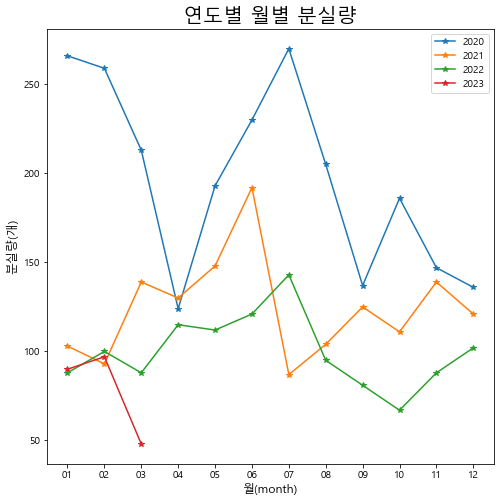

In [43]:
#꺾은선 그래프 그리기 => 한 연도에 대한 월별 데이터

df2020 = tmp1.query('수령일자_연 == "2020"') 
month = df2020['수령일자_월']
lost2020 = df2020['분실량']
 
df2021 = tmp1.query('수령일자_연 == "2021"') 
lost2021 = df2021['분실량']
 
df2022 = tmp1.query('수령일자_연 == "2022"') 
lost2022 = df2022['분실량']

df2023 = tmp1.query('수령일자_연 == "2023"')
month2023 = df2023['수령일자_월']
lost2023 = df2023['분실량']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.set_xlabel('월(month)', size=12)
ax.set_ylabel('분실량(개)', size=12)
 
ax.plot(month, lost2020, marker='*', label='2020')
ax.plot(month, lost2021, marker='*', label='2021')
ax.plot(month, lost2022, marker='*', label='2022')
ax.plot(month2023, lost2023, marker='*', label='2023')
 
ax.legend()
 
plt.title('연도별 월별 분실량',fontsize=20)
plt.show()

#### 3-2. 연도별 월별 회수율 (수령여부 기준) - 꺾은선

In [44]:
# 조건에 맞는 데이터프레임 재편성

tmp2 = pd.DataFrame(lostfound_5year.groupby(["수령일자_연", '수령일자_월', "분실물상태"]).count()["분실물SEQ"]).rename(columns={"분실물SEQ": "분실량"}).reset_index()
tmp2

,수령일자_연,수령일자_월,분실물상태,분실량
0,2020,01,보관,136
1,2020,01,수령,118
2,2020,01,이관,12
3,2020,02,보관,98
4,2020,02,수령,151
...,...,...,...,...
112,2023,02,수령,61
113,2023,02,이관,19
114,2023,03,보관,3
115,2023,03,수령,20


In [45]:
# 연도별 수령량

tmp2 = tmp2[tmp2['분실물상태']=='수령']
tmp2

,수령일자_연,수령일자_월,분실물상태,분실량
1,2020,01,수령,118
4,2020,02,수령,151
7,2020,03,수령,121
10,2020,04,수령,90
13,2020,05,수령,158
16,2020,06,수령,161
19,2020,07,수령,195
22,2020,08,수령,163
25,2020,09,수령,101
28,2020,10,수령,134


In [46]:
tmp3 = pd.merge(tmp1, tmp2, on=['수령일자_연', '수령일자_월'], how = 'inner')
tmp3.rename(columns={'분실량_x':'총 분실량', '분실량_y':'수령량'}, inplace = True)
tmp3

,수령일자_연,수령일자_월,총 분실량,분실물상태,수령량
0,2020,01,266,수령,118
1,2020,02,259,수령,151
2,2020,03,213,수령,121
3,2020,04,124,수령,90
4,2020,05,193,수령,158
5,2020,06,230,수령,161
6,2020,07,270,수령,195
7,2020,08,205,수령,163
8,2020,09,137,수령,101
9,2020,10,186,수령,134


In [47]:
tmp3.drop(['분실물상태'], axis=1, inplace = True)
tmp3

,수령일자_연,수령일자_월,총 분실량,수령량
0,2020,01,266,118
1,2020,02,259,151
2,2020,03,213,121
3,2020,04,124,90
4,2020,05,193,158
5,2020,06,230,161
6,2020,07,270,195
7,2020,08,205,163
8,2020,09,137,101
9,2020,10,186,134


In [48]:
tmp3['회수율'] = round(tmp3['수령량']/tmp3['총 분실량'] * 100, 2)
tmp3

,수령일자_연,수령일자_월,총 분실량,수령량,회수율
0,2020,01,266,118,44.36
1,2020,02,259,151,58.30
2,2020,03,213,121,56.81
3,2020,04,124,90,72.58
4,2020,05,193,158,81.87
5,2020,06,230,161,70.00
6,2020,07,270,195,72.22
7,2020,08,205,163,79.51
8,2020,09,137,101,73.72
9,2020,10,186,134,72.04


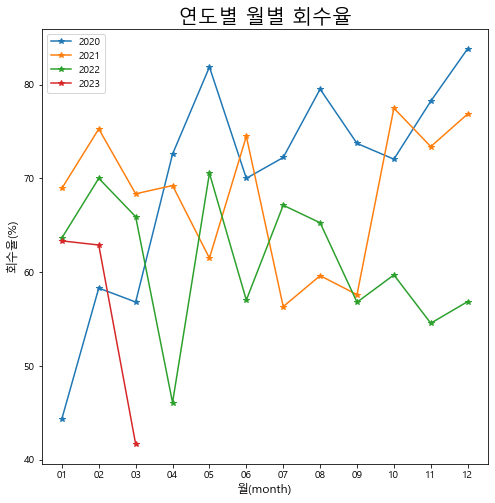

In [49]:
#꺾은선 그래프 그리기 => 한 연도에 대한 월별 데이터

df2020 = tmp3.query('수령일자_연 == "2020"') 
month = df2020['수령일자_월']
lost2020 = df2020['회수율']
 
df2021 = tmp3.query('수령일자_연 == "2021"') 
lost2021 = df2021['회수율']
 
df2022 = tmp3.query('수령일자_연 == "2022"') 
lost2022 = df2022['회수율']

df2023 = tmp3.query('수령일자_연 == "2023"')
month2023 = df2023['수령일자_월']
lost2023 = df2023['회수율']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.set_xlabel('월(month)', size=12)
ax.set_ylabel('회수율(%)', size=12)
 
ax.plot(month, lost2020, marker='*', label='2020')
ax.plot(month, lost2021, marker='*', label='2021')
ax.plot(month, lost2022, marker='*', label='2022')
ax.plot(month2023, lost2023, marker='*', label='2023')
 
ax.legend()
 
plt.title('연도별 월별 회수율',fontsize=20)
plt.show()

#### 3-3. 카테고리별 분실 - 막대

In [50]:
# 조건에 맞는 데이터프레임 재편성

tmp3 = pd.DataFrame(lostfound_5year.groupby(["분실물종류"]).count()["분실물SEQ"]).rename(columns={"분실물SEQ": "분실량"}).reset_index()
tmp3

,분실물종류,분실량
0,가방,578
1,기타,1787
2,서류봉투,31
3,쇼핑백,256
4,옷,109
5,장난감,6
6,지갑,897
7,책,28
8,파일,7
9,핸드폰,1594


In [51]:
# 개수에 따른 재정렬

tmp3 = tmp3.sort_values(by = ['분실량']).reset_index(drop=True)
tmp3

,분실물종류,분실량
0,장난감,6
1,파일,7
2,책,28
3,서류봉투,31
4,옷,109
5,쇼핑백,256
6,가방,578
7,지갑,897
8,핸드폰,1594
9,기타,1787


Text(0.5, 1.0, '카테고리별 분실율')

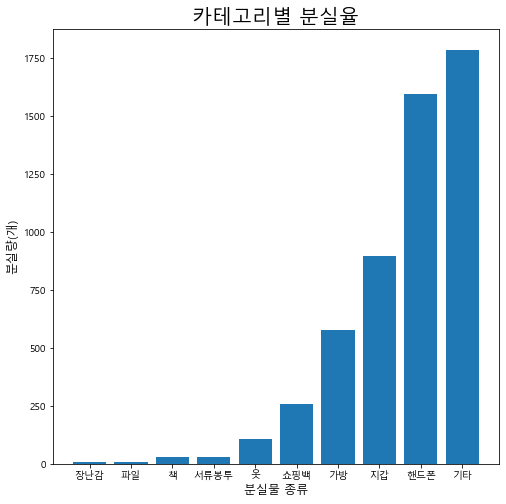

In [52]:
# 막대 그래프 그리기

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot()

category = tmp3['분실물종류']
lostall = tmp3['분실량']

ax.set_xlabel('분실물 종류', size=12)
ax.set_ylabel('분실량(개)', size=12)

plt.bar(category, lostall)
plt.title('카테고리별 분실율', fontsize = 20)

#### 3-4. 자치구별 분실율 (자치구별 분실량 / 전체 분실량) - 막대그래프

In [53]:
# 조건에 맞는 데이터프레임 재편성

tmp4 = pd.DataFrame(lostfound_5year.groupby(["분실지역"]).count()["분실물SEQ"]).rename(columns={"분실물SEQ": "분실량"}).sort_values(by = ['분실량']).reset_index()
tmp4

,분실지역,분실량
0,강남구,1
1,서초구,2
2,금천구,21
3,중랑구,37
4,영등포구,47
5,노원구,90
6,강동구,182
7,광진구,234
8,동작구,270
9,은평구,280


In [54]:
tmp4['지역별 분실율'] = round((tmp4['분실량'] / tmp4['분실량'].sum()) * 100, 2)
tmp4

,분실지역,분실량,지역별 분실율
0,강남구,1,0.02
1,서초구,2,0.04
2,금천구,21,0.40
3,중랑구,37,0.70
4,영등포구,47,0.89
5,노원구,90,1.70
6,강동구,182,3.44
7,광진구,234,4.42
8,동작구,270,5.10
9,은평구,280,5.29


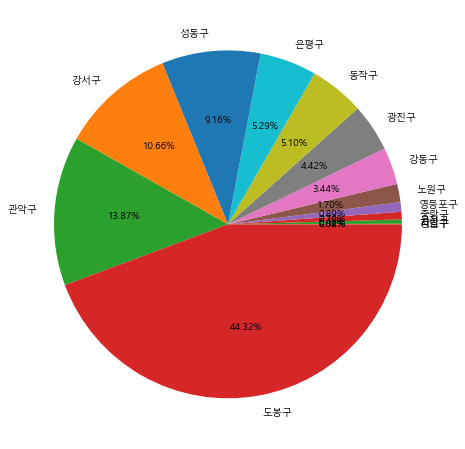

In [55]:
# 파이 그래프 그리기

fig = plt.figure(figsize = (8, 8))
ax = plt.subplot()

plt.pie(tmp4['분실량'], labels = tmp4['분실지역'], autopct='%.2f%%')
plt.show()

In [56]:
# 상위 10개만 저장

tmp4['지역별 분실율'] = round((tmp4['분실량'] / tmp4['분실량'].sum()) * 100, 2)
tmp4 = tmp4.tail(10)
tmp4

,분실지역,분실량,지역별 분실율
4,영등포구,47,0.89
5,노원구,90,1.70
6,강동구,182,3.44
7,광진구,234,4.42
8,동작구,270,5.10
9,은평구,280,5.29
10,성동구,485,9.16
11,강서구,564,10.66
12,관악구,734,13.87
13,도봉구,2346,44.32


Text(0.5, 1.0, '지역별 분실율')

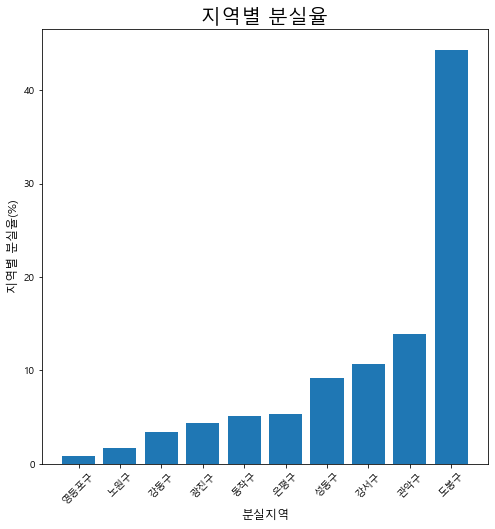

In [57]:
# 막대 그래프 그리기

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot()

location = tmp4['분실지역']
lostloc = tmp4['지역별 분실율']

ax.set_xlabel('분실지역', size=12)
ax.set_ylabel('지역별 분실율(%)', size=12)

plt.bar(location, lostloc)
plt.xticks(rotation = 45)
plt.title('지역별 분실율', fontsize=20)

#### 3-5. 분실물 상태에 따른 비율 - 파이

In [58]:
# 조건에 맞는 데이터프레임 재편성

tmp5 = pd.DataFrame(lostfound_5year.groupby(["분실물상태"]).count()["분실물SEQ"]).rename(columns={"분실물SEQ": "분실량"}).reset_index()
tmp5

,분실물상태,분실량
0,보관,1167
1,수령,3518
2,이관,608


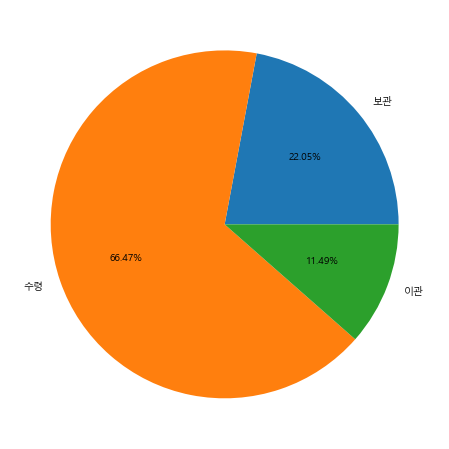

In [59]:
# 파이 그래프 그리기

fig = plt.figure(figsize = (8, 8))
ax = plt.subplot()

plt.pie(tmp5['분실량'], labels = tmp5['분실물상태'], autopct='%.2f%%')
plt.show()

---

### 4. JSON 파일

In [60]:
# 백엔드 스키마 구조에 따른 컬럼 순서 변경

lostfound_5yearb = lostfound_5year[['분실물SEQ', '분실물명', '유실물상세내용', '분실물상태', '분실물종류', '분실물등록자ID', '수령일자', '분실지역', '습득자(회사)', '등록일자']]
lostfound_5yearb

,분실물SEQ,분실물명,유실물상세내용,분실물상태,분실물종류,분실물등록자ID,수령일자,분실지역,습득자(회사),등록일자
0,61741512,전자담배,저희 삼이택시에서는 2023년 03월 07일 기타을(를) 습득/보관 하(였습니다.)...,보관,기타,samitaxi,2023-03-07,관악구,삼이택시,2023-03-07
1,61741511,(본인수령완료)애플위치 임채*씨 010-5763-****,저희 동도자동차에서는 2023년 03월 05일 기타을(를) 습득/보관 하(였습니다....,수령,기타,dongdo37,2023-03-05,광진구,동도자동차,2023-03-07
2,61741491,안경,저희 삼이택시에서는 2023년 03월 04일 기타을(를) 습득/보관 하(였습니다.)...,보관,기타,samitaxi,2023-03-04,관악구,삼이택시,2023-03-06
3,61741453,아이폰/ 본인통화 내사 후 찾아감(김*린 010-46**-94**) -3/1,저희 경일운수에서는 2023년 03월 01일 핸드폰을(를) 습득/보관 하(였습니다....,수령,핸드폰,kyoungil10,2023-03-01,도봉구,경일운수,2023-03-06
4,61741451,에어팟0보라색 -한족 /본인통화 내사 후 찾아감/ 서*택 010-87**-64**(...,저희 경일운수에서는 2023년 02월 25일 기타을(를) 습득/보관 하(였습니다.)...,수령,기타,kyoungil10,2023-02-25,도봉구,경일운수,2023-03-06
...,...,...,...,...,...,...,...,...,...,...
5289,61718237,갈색 장갑,저희 상진운수에서는 2020년 01월 04일 기타을(를) 습득/보관 하(였습니다.)...,수령,기타,상진운수,2020-01-04,도봉구,상진운수,2020-01-04
5290,61718208,갤럭시 노트 10(연락됨),저희 대진흥업에서는 2020년 01월 01일 핸드폰을(를) 습득/보관 하(였습니다....,수령,핸드폰,daejin8013,2020-01-01,광진구,대진흥업,2020-01-03
5291,61718193,손가방지갑(차*관)현금=찾아감,저희 동성상운에서는 2020년 01월 02일 가방(손가방지갑(차*관)현금=찾아감)을...,수령,가방,ehdtjd,2020-01-02,노원구,동성상운,2020-01-02
5292,61718181,검은색보조배터리,저희 고려운수에서는 2020년 01월 01일 기타을(를) 습득/보관 하(였습니다.)...,보관,기타,krcars,2020-01-01,성동구,고려운수,2020-01-02


In [61]:
# 컬럼명 스키마 변수명과 동일하게 변경

lostfound_5yearb = lostfound_5yearb.rename(columns={"분실물명": "name", "유실물상세내용":"description", '분실물상태':'status', '분실물종류':'category', '수령일자':'pickupDate', '분실지역':'takePlace', '습득자(회사)':'lostPlace', '등록일자':'createdAt'})

In [62]:
# 분실물 등록자iD 날리기

lostfound_5yearb['description'] = lostfound_5yearb['description'].str.replace('\\', '').str.replace('<br>', '')

In [63]:
# 백엔드에서 쓰기 위한 json 파일로 변환

lostfound_5yearb.to_json(force_ascii=False, orient = 'index')
lostfound_5year_json = lostfound_5yearb.replace("'\'", '').replace('<br>', '')
lostfound_5year_json.to_json('lostfound.json', force_ascii = False, orient='index')